In [9]:

import seaborn as sns
import sklearn
import pandas as pd
import numpy as np

In [15]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [16]:
df = pd.merge( test, train)

In [17]:
y = test.merge(df, on='PassengerId', how = 'right')
df = train.append(y)

<ipython-input-17-b434b6945d75>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train.append(y)


In [18]:

df.groupby('Sex')['PassengerId'].count()

Sex
female    314
male      577
Name: PassengerId, dtype: int64

#м и ж

In [19]:
df.groupby('Pclass')['PassengerId'].count()
     

Pclass
1.0    216
2.0    184
3.0    491
Name: PassengerId, dtype: int64


#класс билета

In [20]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Описательная статистика включает в себя те, которые суммируют центральную тенденцию, дисперсию и форму распределения набора данных, исключая NaN значения.

In [21]:
df[train.Age==5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_y,Name_y,Sex_y,Age_y,SibSp_y,Parch_y,Ticket_y,Fare_y,Cabin_y,Embarked_y
58,59,1,2.0,"West, Miss. Constance Mirium",female,5.0,1.0,2.0,C.A. 34651,27.7500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,234,1,3.0,"Asplund, Miss. Lillian Gertrud",female,5.0,4.0,2.0,347077,31.3875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
448,449,1,3.0,"Baclini, Miss. Marie Catherine",female,5.0,2.0,1.0,2666,19.2583,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
777,778,1,3.0,"Emanuel, Miss. Virginia Ethel",female,5.0,0.0,0.0,364516,12.4750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Статистика тарифов билетов

In [22]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


#братья и сестры

In [23]:
df.SibSp.unique()
     

array([1., 0., 3., 4., 2., 5., 8.])

Функция unique ()используется для поиска уникальных элементов массива.Возвращает отсортированные уникальные элементы массива

In [24]:
df.SibSp.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [25]:
train.SibSp.describe()
test.SibSp.describe()
     

count    418.000000
mean       0.447368
std        0.896760
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

#родители детей

In [26]:
df.Parch.unique()

array([0., 1., 2., 5., 3., 4., 6.])

In [27]:
df.Parch.describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [29]:
men = df[df.Sex == "male"] 
women = df[df.Sex == "female"]

In [28]:
df.Age = df.Age.fillna(df.Age.mean())
df.Age.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [30]:
df = df.drop(labels=['Cabin','Name','Ticket','Embarked'], axis=1)

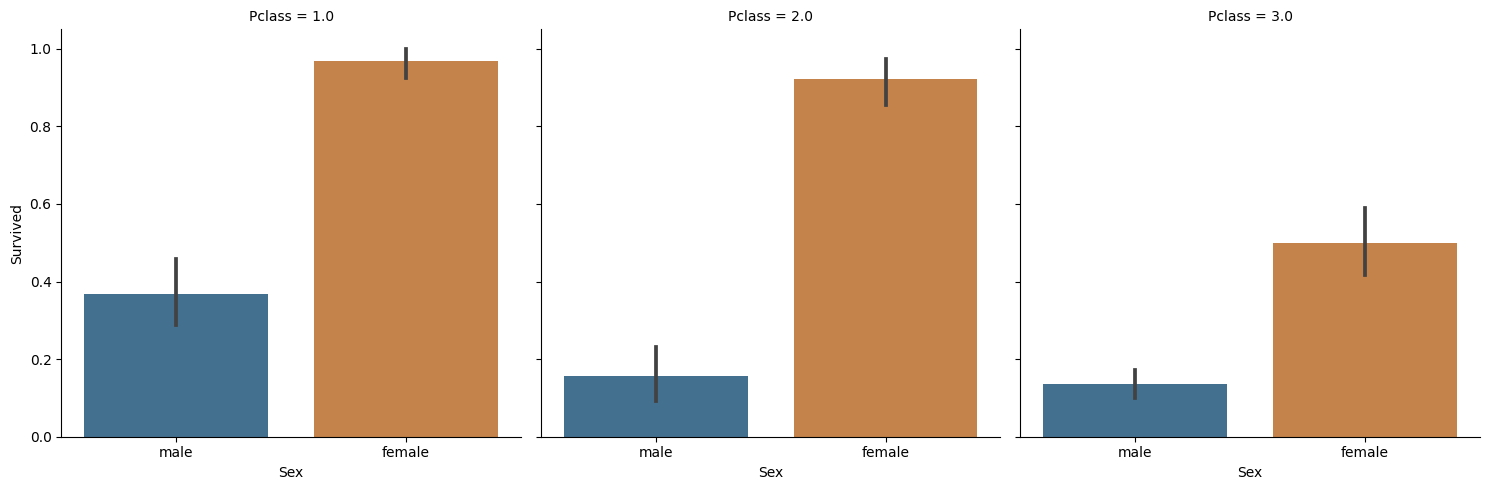

In [31]:
sns.catplot(data = df,y='Survived',x='Sex',col='Pclass',
            kind='bar', saturation=0.5)

#пассажиров 1 класса больше осталось в живых

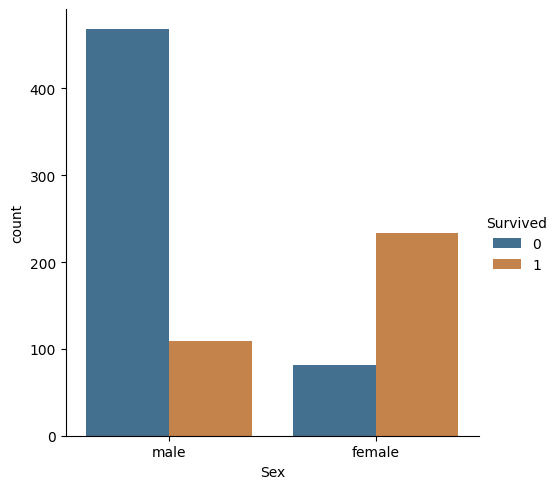

In [32]:
sns.catplot(data = df,hue = 'Survived', x = 'Sex',
            kind='count', saturation=0.5)

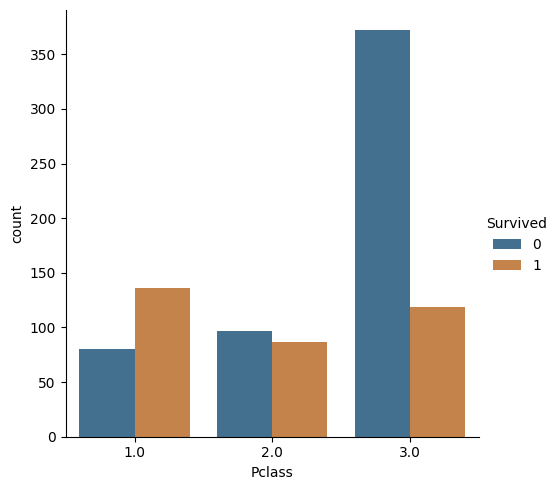

In [33]:
sns.catplot(data = df,hue = 'Survived', x = 'Pclass',
            kind='count', saturation=0.5)

#пассажиров 3 класса осталось меньше в живых

<Axes: >

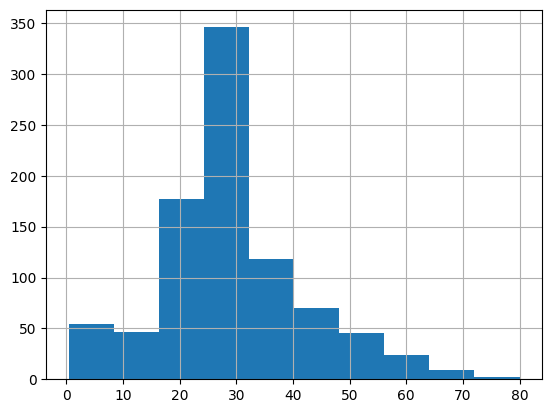

In [34]:
df.Age.hist()


#люди 30 лет, погибли больше всех

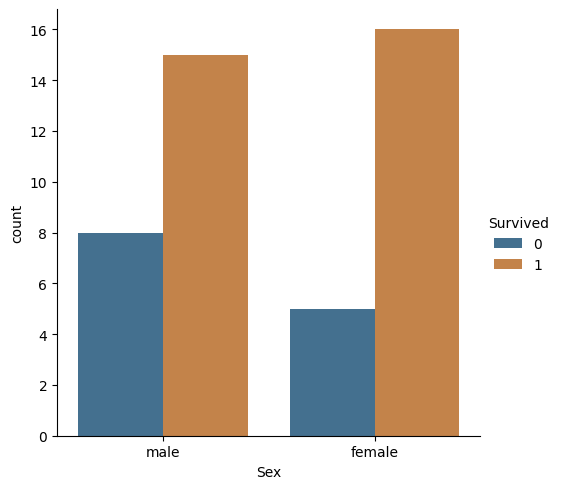

In [35]:

child= df[df.Age<6]
sns.catplot(data = child,hue = 'Survived', 
            x = 'Sex',kind='count', saturation=0.5)
     

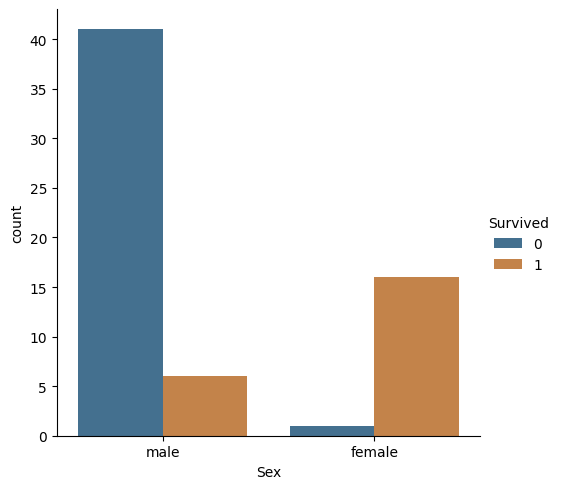

In [36]:
grand= df[df.Age>50]
sns.catplot(data = grand,hue = 'Survived', 
            x = 'Sex',kind='count', saturation=0.5)
     


#по большинству выжили дети и женщины:( и более взрослые люди умирают больше